# Credit Card Fraud Detection

**In this project we will predict fraudulent credit card transactions with the help of Machine learning models.**

In [126]:
# Importing computational packages
import numpy as np
import pandas as pd

# Importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [127]:
#Importing the datasets
path = 'C:\\Users\\Pranay Singhal\\Desktop\\college project\\creditcard.csv'
dataset = pd.read_csv(path)

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [129]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [130]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [131]:
# Checking for the missing value present in each columns
total = dataset.isnull().sum().sort_values(ascending = False)
percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
dataset["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This tell us that our dataset is highly imbalanced

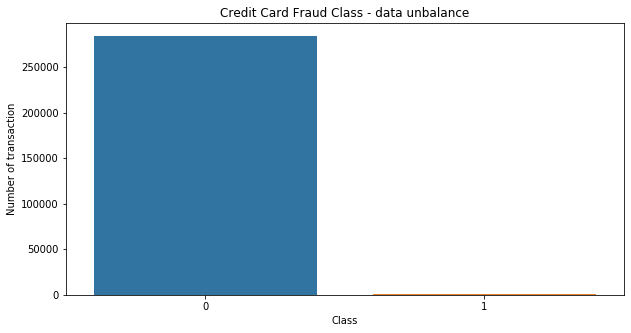

In [133]:
# Visualization of training data

# Individual Plots - a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))
sns.countplot(dataset["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")
plt.show()

In [134]:
#Observe the distribution of our classes
classes=dataset['Class'].value_counts()
normal_share = round(classes[0] / dataset['Class'].count()*100,2)
fraud_share = round(classes[1] / dataset['Class'].count()*100, 2)
normal_share, fraud_share

(99.83, 0.17)

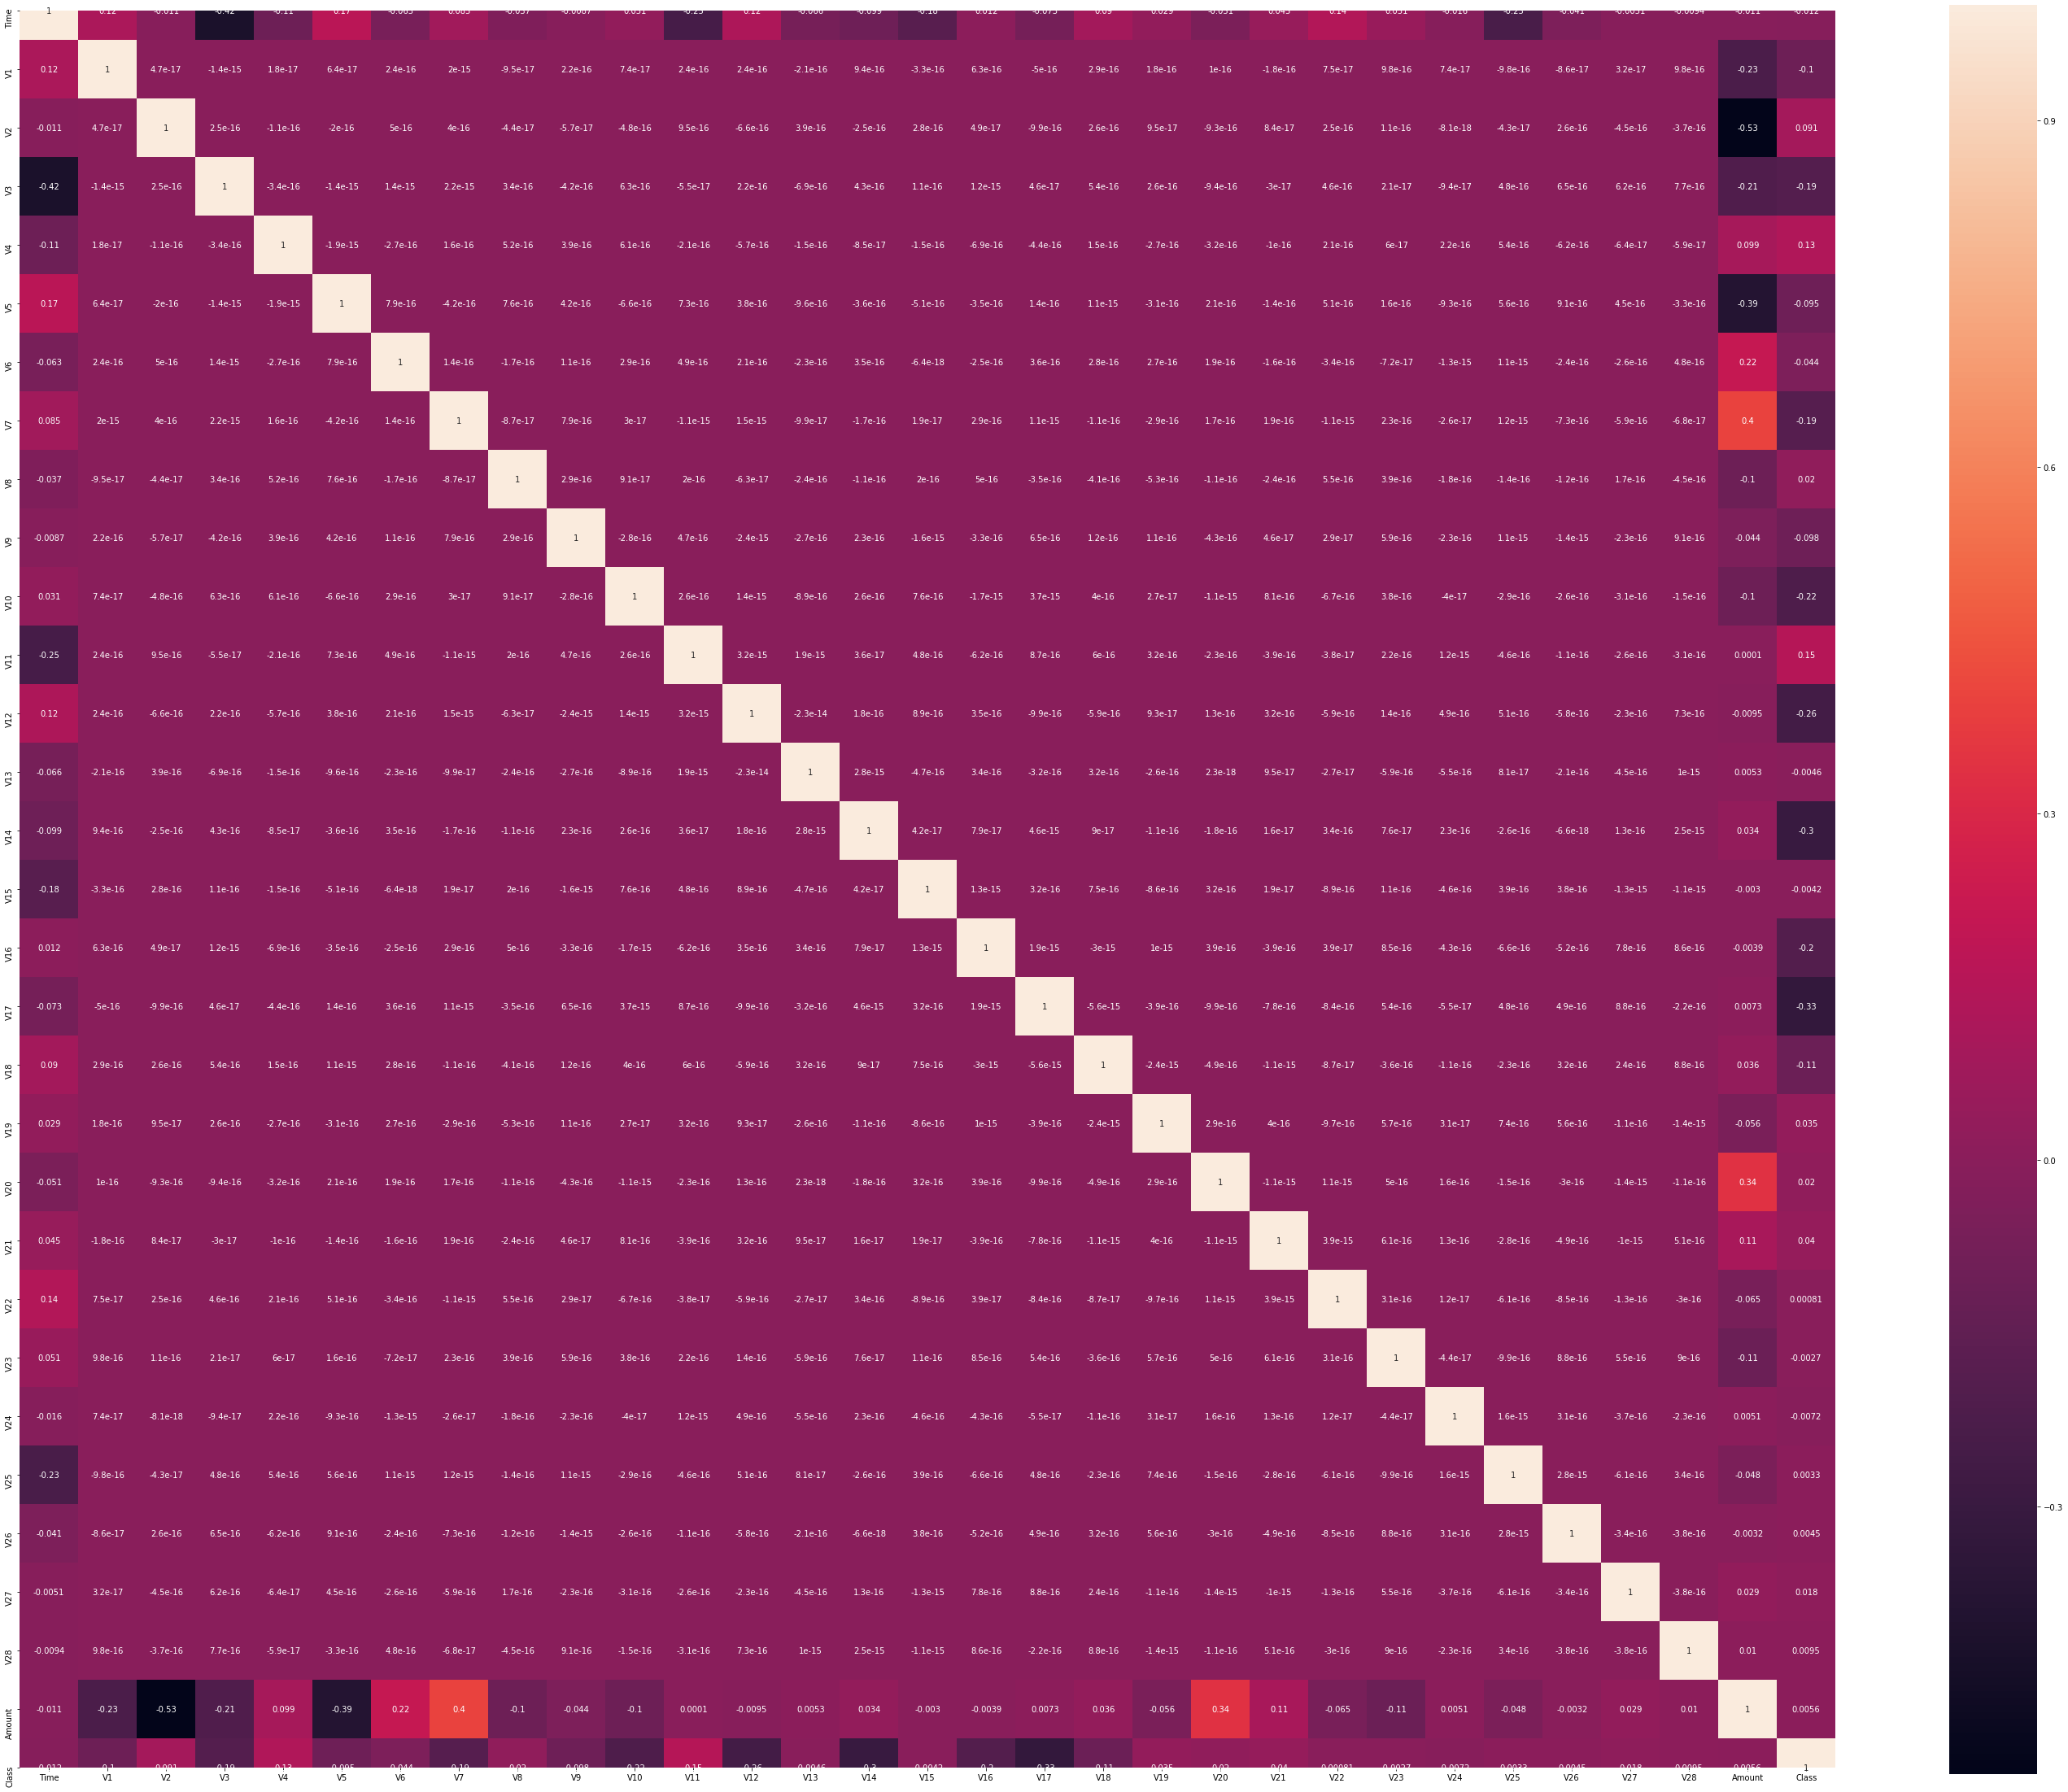

In [135]:
# Heatmap 
import seaborn as sns
f, ax = plt.subplots(figsize=(50, 40))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=None, square=True, ax=ax,annot=True)
plt.show()

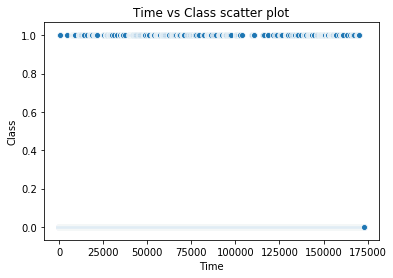

In [136]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(dataset["Time"], dataset["Class"])
plt.title("Time vs Class scatter plot")
plt.show()

**Observation**

There is not much insight can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

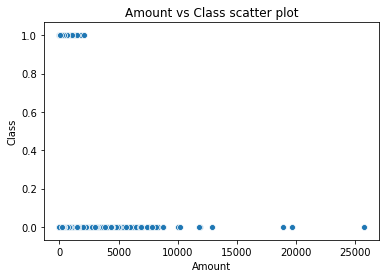

In [137]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(dataset["Amount"], dataset["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

**Observation**

Clearly low amount transactions are more likely to be fraudulent than high amount transaction.
Dropping Time column as this feature is not going to help in the model building.

In [138]:
# Drop unnecessary columns
dataset = dataset.drop("Time", axis = 1)

**Plotting the distributions of all the featuers**

<Figure size 432x288 with 0 Axes>

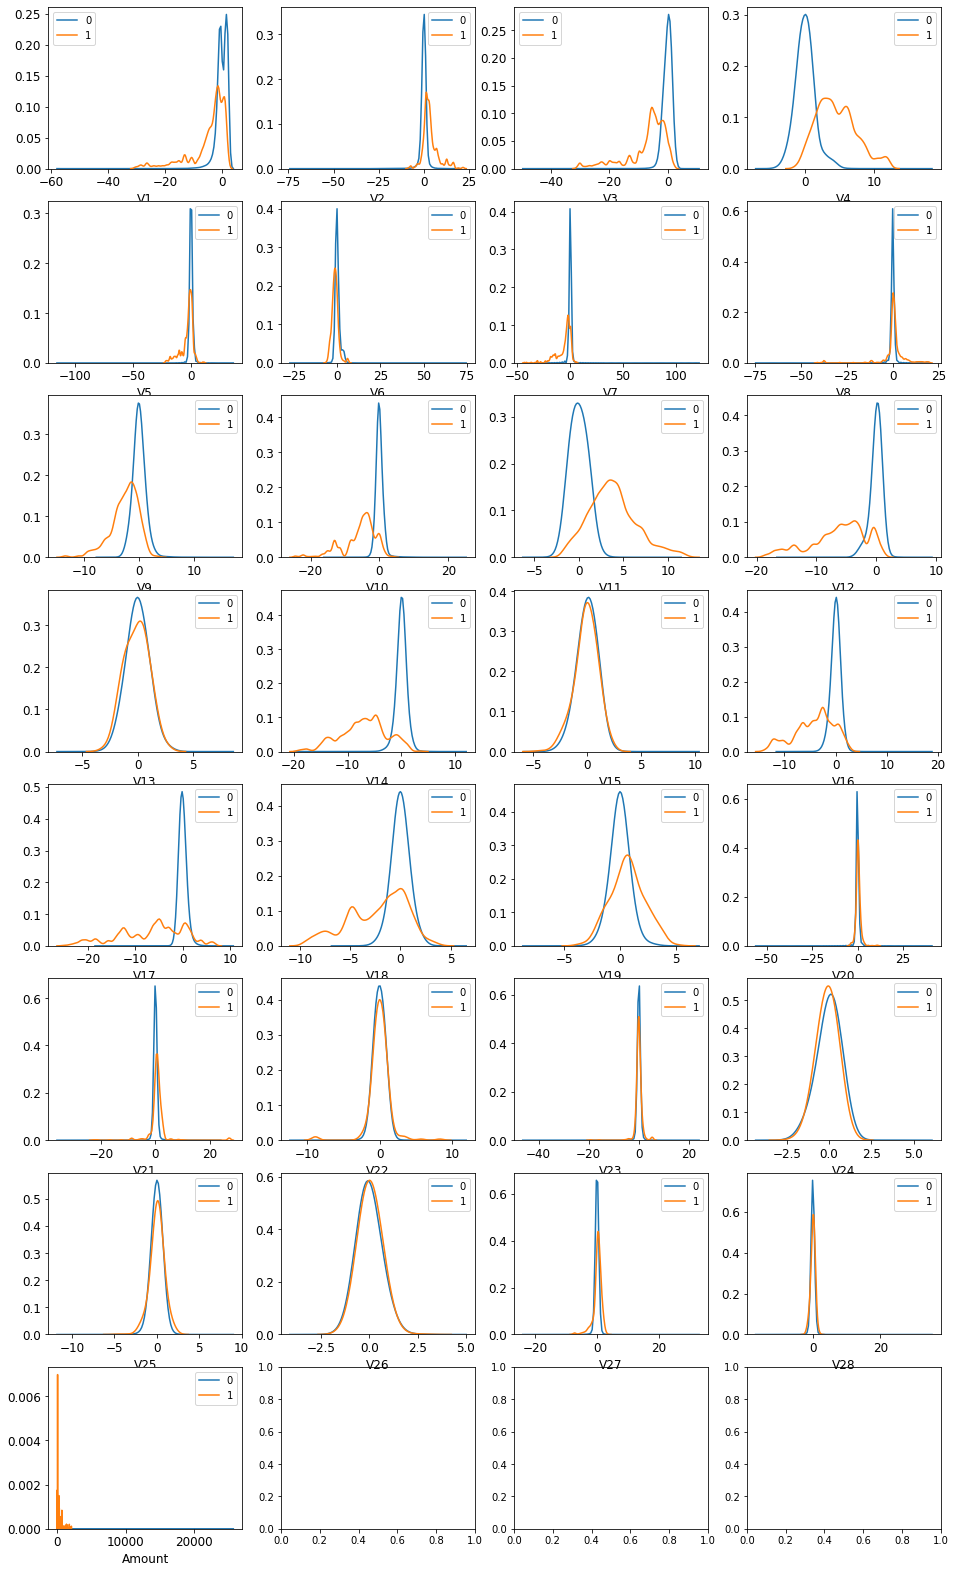

In [139]:
# Plotting all the variable in displot to visualise the distribution
var = list(dataset.columns.values)

# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = dataset.loc[dataset['Class'] == 0]
t1 = dataset.loc[dataset['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

**Observation**

We can see that for most of the features, distributions are overlapping for both the fraud and non-fraud transactions.

**Splitting into training and test dataset**

In [140]:
#Random UnderSampling
fraud_data = dataset.loc[dataset['Class']==1]
non_fraud_data = dataset.loc[dataset['Class']==0][:1500]
undersample_data = pd.concat([fraud_data, non_fraud_data])
undersample_data = undersample_data.sample(frac=1)

In [141]:
undersample_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
668,1.335369,0.535982,-0.448156,0.902998,0.517134,-0.694213,0.590279,-0.348319,-0.344490,0.022530,...,-0.042465,-0.021676,-0.259350,-0.412243,0.991928,-0.247183,-0.003841,0.004311,2.27,0
102,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,0.127497,...,-0.290987,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,0
153,1.316178,-0.105594,-0.246480,-1.185715,-0.119566,-0.613399,0.007359,-0.136794,0.847827,-0.784715,...,0.093118,0.404571,-0.282551,-0.456799,0.895368,-0.561880,0.044794,0.003181,7.21,0
736,-2.618386,-2.302449,-0.386400,0.854628,-0.861209,2.036707,3.885511,-0.016542,-1.569959,-0.966025,...,0.615239,-0.145438,2.002551,-1.419615,0.626973,0.878217,-0.377409,0.143628,986.31,0
276071,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,0.249311,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,0.503302,0.930065,-0.857525,2.042940,-1.505946,-1.000185,-1.991363,0.460577,-1.124101,-1.974617,...,0.379925,-0.062191,-0.012187,0.479788,0.531947,-0.441323,0.460792,0.219985,2.00,0
79525,-2.630598,5.125759,-6.092255,5.527393,1.605145,-2.319884,-3.207076,-1.482583,-5.074871,-6.778331,...,-0.527474,0.220546,-1.371110,-0.504899,0.382307,0.395528,0.782036,0.628528,1.00,1
139,-4.257597,1.649489,-1.591242,-1.374317,-1.180136,-0.331040,-0.117992,1.592032,0.415996,0.159163,...,-0.452568,-0.671703,0.001422,-0.876377,0.070098,0.729582,-0.002942,-0.481497,124.67,0
63,-0.249361,0.399227,0.068009,-1.060619,2.410399,3.736574,0.316446,0.672296,0.015140,-0.269502,...,-0.257663,-0.616762,-0.156669,1.031135,0.120617,0.310494,-0.288299,-0.223964,32.51,0


In [142]:
y = undersample_data["Class"]
X = undersample_data.drop("Class" , axis = 1)

In [143]:
# Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [144]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
698,-0.378417,0.751515,1.772256,0.311020,-0.329130,-0.746206,0.719034,-0.081805,-0.152417,-0.661177,...,-0.034612,-0.120891,-0.240394,-0.057803,0.733812,-0.049448,0.207357,0.023386,0.057469,25.41
262,-0.143256,0.743649,1.534072,1.062170,0.208187,-0.838623,0.524151,-0.294661,-0.478856,-0.006097,...,0.271423,-0.205014,-0.460893,0.047407,0.339243,-0.779439,0.234456,-0.024125,-0.049898,1.98
675,-0.259961,0.998646,1.437975,0.038031,0.125405,-0.957775,0.899758,-0.270159,-0.186834,-0.291503,...,0.171635,-0.316535,-0.697534,-0.035228,0.322387,-0.198797,0.044630,0.077318,-0.125135,8.93
177,1.194066,-0.072582,0.635286,0.768616,-0.735584,-0.673466,-0.146299,-0.065653,0.646048,-0.211574,...,-0.120277,-0.300561,-0.770991,0.074444,0.397713,0.285947,0.286760,-0.031033,0.017052,23.88
1241,-0.922509,0.480399,2.091886,1.646377,-0.512384,0.229682,0.630477,-0.591026,0.705361,0.819822,...,0.014063,0.113923,0.906466,-0.295780,0.442751,-0.324682,-0.153798,-0.826676,-0.028785,84.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,1.492936,-1.029346,0.454795,-1.438026,-1.555434,-0.720961,-1.080664,-0.053127,-1.978682,1.638076,...,-0.387910,-0.177650,-0.175074,0.040002,0.295814,0.332931,-0.220385,0.022298,0.007602,5.00
314,-1.465381,1.382172,1.019790,0.250367,1.011414,-1.281807,1.186866,-0.312608,-0.701503,-1.067341,...,0.004784,-0.038147,0.083481,-0.266017,0.270833,0.754353,-0.491529,-0.689819,-0.329374,1.00
134,-1.897331,0.955626,0.052543,1.276656,-3.323084,3.229911,1.029631,1.515607,-0.059627,-1.461403,...,-0.832630,0.128416,0.776078,0.477537,-0.608981,-1.120892,-0.413851,0.061399,-0.187964,552.18
842,-3.055529,-0.557340,2.144689,3.289656,0.273454,1.473169,-0.423035,0.765013,-0.421320,1.196380,...,-0.325894,-0.348269,0.302615,1.007227,-0.265049,0.277047,0.267188,0.141052,0.097155,75.93


**Feature Scaling** 

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
869,-3.015858,0.721316,0.126190,-0.627188,0.037821,-0.354354,-0.322216,0.976949,0.076279,0.082528,...,-0.033525,-0.187606,-0.292258,-0.357114,-0.228333,-0.228307,0.245560,-0.368090,-0.406092,-0.389012
929,-1.246853,0.577702,1.790394,0.621528,0.847138,-0.630923,0.271991,-0.278619,-0.305083,0.053069,...,-0.158896,-0.293417,-0.607962,-0.370918,0.061990,-0.187873,0.249143,-0.381316,-0.148349,-0.387668
707,-1.393265,-1.095569,2.607795,-2.529060,-0.135265,-0.373239,0.221446,-0.962847,-1.304498,2.139301,...,-0.229820,-0.281365,0.563218,-0.129765,0.089264,0.317551,-0.288551,-0.863521,-0.519168,-0.277801
539,-0.844953,1.396044,1.325804,0.503092,0.005609,-0.727816,0.692732,0.251972,-1.442764,-0.447369,...,-0.146558,0.096804,0.069221,0.025522,0.450556,-0.402728,0.607588,-0.091074,0.080906,-0.267932
850,1.189563,0.229975,0.625193,0.552512,-0.470362,-0.766847,0.017707,-0.111003,-0.329524,0.080094,...,-0.031827,-0.180348,-0.544012,0.135022,0.548809,0.179782,0.061484,-0.029649,0.013586,-0.351988


In [146]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
698,-0.378417,0.751515,1.772256,0.311020,-0.329130,-0.746206,0.719034,-0.081805,-0.152417,-0.661177,...,-0.034612,-0.120891,-0.240394,-0.057803,0.733812,-0.049448,0.207357,0.023386,0.057469,-0.275902
262,-0.143256,0.743649,1.534072,1.062170,0.208187,-0.838623,0.524151,-0.294661,-0.478856,-0.006097,...,0.271423,-0.205014,-0.460893,0.047407,0.339243,-0.779439,0.234456,-0.024125,-0.049898,-0.384471
675,-0.259961,0.998646,1.437975,0.038031,0.125405,-0.957775,0.899758,-0.270159,-0.186834,-0.291503,...,0.171635,-0.316535,-0.697534,-0.035228,0.322387,-0.198797,0.044630,0.077318,-0.125135,-0.352266
177,1.194066,-0.072582,0.635286,0.768616,-0.735584,-0.673466,-0.146299,-0.065653,0.646048,-0.211574,...,-0.120277,-0.300561,-0.770991,0.074444,0.397713,0.285947,0.286760,-0.031033,0.017052,-0.282991
1241,-0.922509,0.480399,2.091886,1.646377,-0.512384,0.229682,0.630477,-0.591026,0.705361,0.819822,...,0.014063,0.113923,0.906466,-0.295780,0.442751,-0.324682,-0.153798,-0.826676,-0.028785,-0.000007


**Ploting the distribution of variable to handle skewness**

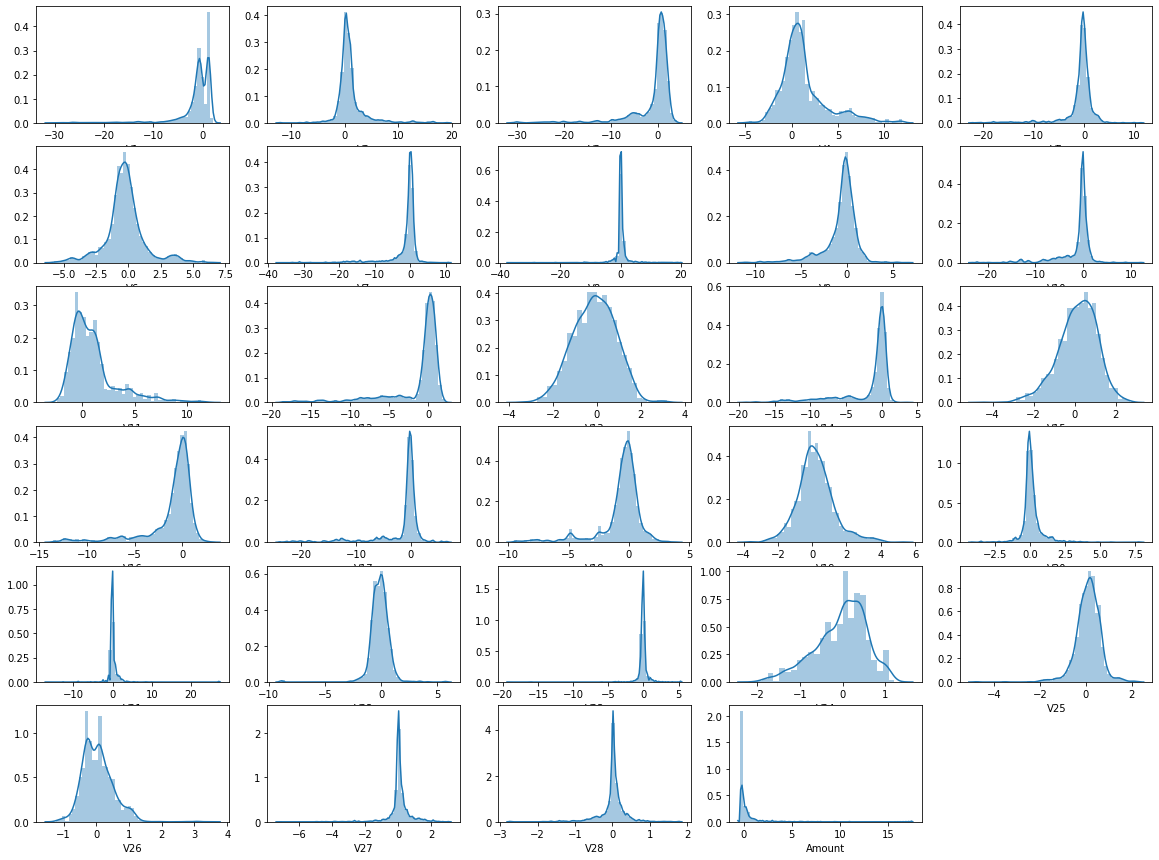

In [147]:
var = X_train.columns
plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(6,5, i)
    sns.distplot(X_train[col])

plt.show()

**Observation**

Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

In [148]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

skew = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
skew.set_index("Features", inplace=True)
skew

,Skewness
Features,
V1,-3.950174
V2,2.613059
V3,-3.256635
V4,1.445461
V5,-3.382182
V6,0.358883
V7,-3.781424
V8,-3.752795
V9,-1.828946


In [149]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = skew.loc[(skew["Skewness"] > 1) | (skew["Skewness"] <-1 )].index
skewed

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22', 'V23', 'V26', 'V27',
       'V28', 'Amount'],
      dtype='object', name='Features')

In [150]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])

# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

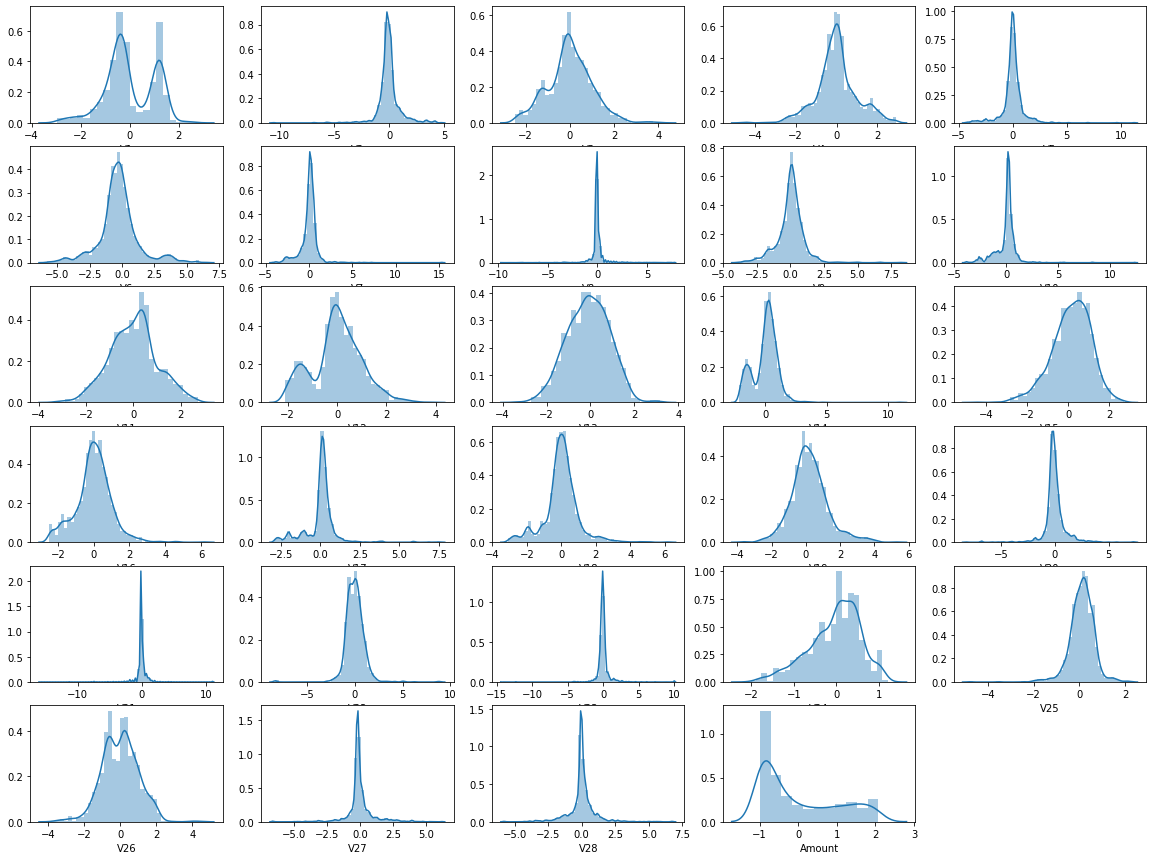

In [151]:
# plot the histogram of a variable from the dataset again to see the result 
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(6,5, i)
    sns.distplot(X_train[col])

plt.show()

In [152]:
#Implementing the Logistic Regression Model
model1 = LogisticRegression(random_state = 42)
model1.fit(X_train, y_train)
prediction = model1.predict(X_test)
model1_accuracy = metrics.accuracy_score(prediction, y_test)
print('The accuracy of Logistic Regression is: ', model1_accuracy)

The accuracy of Logistic Regression is:  0.9649122807017544


In [153]:
# Confusion Matrix to check false positives and false negatives
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , prediction)
print(cm)

[[293   5]
 [  9  92]]


In [154]:
# Using Cross Validation to get maximum accuracy
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = model1 , X = X_train , y = y_train , cv = 10)
accuracy.mean()

0.9730225057619439

In [155]:
# Implementing the Decision Tree Model
model2 = DecisionTreeClassifier(max_depth = 2 , random_state = 42)
model2.fit(X_train, y_train)
prediction = model2.predict(X_test)
model2_accuracy = metrics.accuracy_score(prediction, y_test)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of Decision Tree is:  0.9373433583959899


In [156]:
# Confusion Matrix to check false positives and false negatives
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , prediction)
print(cm)

[[285  13]
 [ 12  89]]


In [157]:
# Using Cross Validation to get maximum accuracy
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = model2 , X = X_train , y = y_train , cv = 10)
accuracy.mean()

0.9504122963787648

Text(0, 0.5, 'Accuracy')

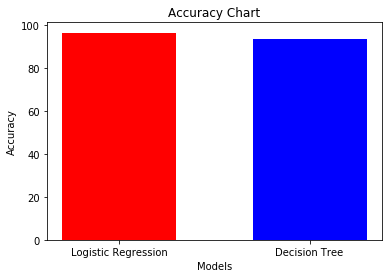

In [169]:
# Plotting the accuracy of models implemented
xaxis = ["Logistic Regression" , "Decision Tree"]
yaxis = [model1_accuracy * 100 , model2_accuracy * 100]
plt.bar(xaxis , yaxis , color = ["red" , "blue"] , width = 0.6)

plt.title("Accuracy Chart")
plt.xlabel("Models")
plt.ylabel("Accuracy")

**Observation**

From the models it is clear that Logistic Regression is a better classifier than Decision Tree for a binary classifiaction problem 